In [ ]:
import pandas as pd

# Load the Excel file
file_path = "/content/Penajam_Paser_Utara.xlsx"
xls = pd.ExcelFile(file_path)

# Check sheet names
xls.sheet_names

['Sheet1']

In [ ]:
# Load the first sheet
df = pd.read_excel(xls, sheet_name="Sheet1")

# Display the first few rows to understand the structure
df.head()

,Kecamatan,Desa/Kelurahan,Luas (km²),Hutan Belukar (ha),Padang Rumput (ha)
0,Penajam,Girimukti,350,1200,300
1,Penajam,Gunung Seteleng,320,1100,250
2,Penajam,Riko,280,1000,200
3,Sepaku,Bukit Raya,400,1400,400
4,Sepaku,Karang Jinawi,370,1300,350


In [ ]:
# Menghitung statistik dasar untuk kolom numerik
stats = df.describe()

# Menampilkan hasil statistik dasar
stats

,Luas (km²),Hutan Belukar (ha),Padang Rumput (ha)
count,9.000000,9.000000,9.000000
mean,328.333333,1111.111111,294.444444
std,38.890873,163.511807,57.251880
min,280.000000,900.000000,200.000000
25%,305.000000,1000.000000,270.000000
50%,320.000000,1100.000000,290.000000
75%,350.000000,1200.000000,310.000000
max,400.000000,1400.000000,400.000000


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Menentukan jumlah cluster (misalnya 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Melatih model dengan data luas hutan belukar
df["Cluster"] = kmeans.fit_predict(df[["Hutan Belukar (ha)"]])

# Menampilkan hasil clustering
df[["Kecamatan", "Desa/Kelurahan", "Hutan Belukar (ha)", "Cluster"]]

,Kecamatan,Desa/Kelurahan,Hutan Belukar (ha),Cluster
0,Penajam,Girimukti,1200,0
1,Penajam,Gunung Seteleng,1100,0
2,Penajam,Riko,1000,2
3,Sepaku,Bukit Raya,1400,1
4,Sepaku,Karang Jinawi,1300,1
5,Babulu,Labangka,900,2
6,Babulu,Gunung Mulia,950,2
7,Waru,Sesulu,1100,0
8,Waru,Bangun Mulya,1050,0


In [ ]:
from sklearn.ensemble import IsolationForest

# Menggunakan Isolation Forest untuk mendeteksi anomali
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df["Anomali"] = iso_forest.fit_predict(df[["Hutan Belukar (ha)"]])

# Menandai anomali (-1 berarti anomali, 1 berarti normal)
df[["Kecamatan", "Desa/Kelurahan", "Hutan Belukar (ha)", "Anomali"]]

,Kecamatan,Desa/Kelurahan,Hutan Belukar (ha),Anomali
0,Penajam,Girimukti,1200,1
1,Penajam,Gunung Seteleng,1100,1
2,Penajam,Riko,1000,1
3,Sepaku,Bukit Raya,1400,-1
4,Sepaku,Karang Jinawi,1300,1
5,Babulu,Labangka,900,1
6,Babulu,Gunung Mulia,950,1
7,Waru,Sesulu,1100,1
8,Waru,Bangun Mulya,1050,1


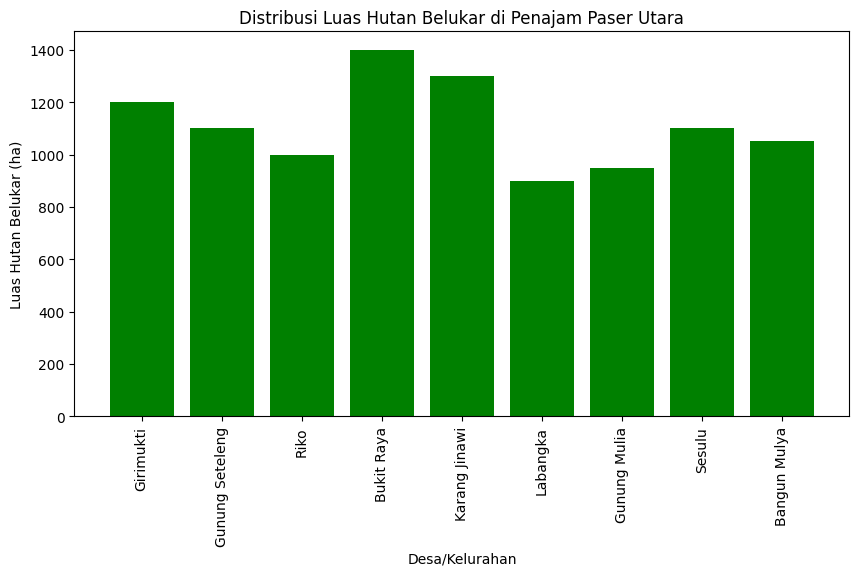

In [ ]:
import matplotlib.pyplot as plt

# Plot distribusi luas hutan belukar
plt.figure(figsize=(10, 5))
plt.bar(df["Desa/Kelurahan"], df["Hutan Belukar (ha)"], color='green')
plt.xticks(rotation=90)
plt.xlabel("Desa/Kelurahan")
plt.ylabel("Luas Hutan Belukar (ha)")
plt.title("Distribusi Luas Hutan Belukar di Penajam Paser Utara")
plt.show()

In [ ]:
# Menampilkan daftar nama kolom untuk memastikan ejaan yang benar
df.columns

Index(['Kecamatan', 'Desa/Kelurahan', 'Luas (km²)', 'Hutan Belukar (ha)',
       'Padang Rumput (ha)', 'Cluster', 'Anomali'],
      dtype='object')

In [ ]:
# Menggunakan nama kolom yang benar
X = df[["Luas (km²)"]].values
y = df["Hutan Belukar (ha)"].values

# Membagi data menjadi training dan testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model SVM
svm_model = SVR(kernel="rbf")
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Model KNN
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluasi performa model
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

mae_svm, mae_knn


(48.46829106112682, 33.33333333333326)

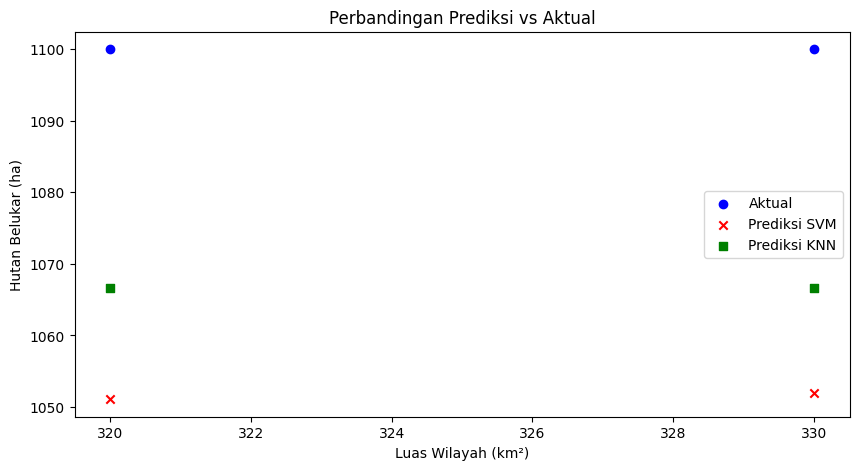

In [ ]:
# Plot hasil prediksi vs aktual
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, label="Aktual", color="blue", marker="o")
plt.scatter(X_test, y_pred_svm, label="Prediksi SVM", color="red", marker="x")
plt.scatter(X_test, y_pred_knn, label="Prediksi KNN", color="green", marker="s")
plt.xlabel("Luas Wilayah (km²)")
plt.ylabel("Hutan Belukar (ha)")
plt.title("Perbandingan Prediksi vs Aktual")
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# Validasi silang manual untuk mencari performa terbaik
svm_model = SVR(kernel="rbf", C=10, gamma="scale")  # Parameter yang mungkin lebih optimal
knn_model = KNeighborsRegressor(n_neighbors=5, weights="distance")

# Evaluasi menggunakan cross-validation
svm_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring="r2")
knn_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring="r2")

# Rata-rata skor R-squared
r2_svm_mean = np.mean(svm_scores)
r2_knn_mean = np.mean(knn_scores)

r2_svm_mean, r2_knn_mean


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

(nan, nan)

In [ ]:
import numpy as np

# Simulasi data historis (misalnya dari 2020 hingga 2024)
tahun = np.arange(2020, 2025)
luas_hutan = np.linspace(50000, 30000, len(tahun)) + np.random.randint(-2020, 2020, len(tahun))  # Tren menurun

# Menyimpan dalam DataFrame
df_hutan = pd.DataFrame({"Tahun": tahun, "Luas Hutan (ha)": luas_hutan})

# Menampilkan data simulasi
df_hutan.head()


,Tahun,Luas Hutan (ha)
0,2020,50163.0
1,2021,43749.0
2,2022,38567.0
3,2023,33315.0
4,2024,30250.0


<ipython-input-19-5c8f1f313c47>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Kecamatan", y="Tutupan_Hutan_%", data=df, palette="Greens")


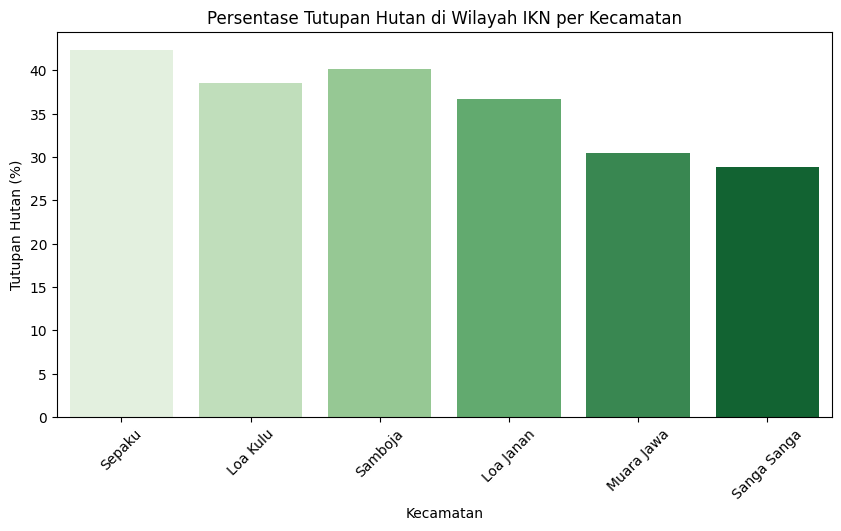

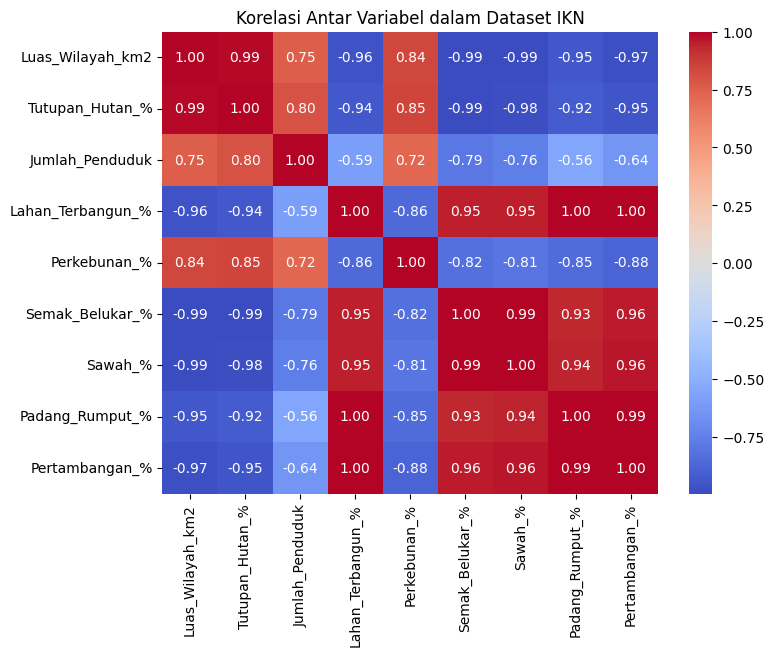

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset wilayah IKN berdasarkan kecamatan
data = {
    "Kecamatan": ["Sepaku", "Loa Kulu", "Samboja", "Loa Janan", "Muara Jawa", "Sanga Sanga"],
    "Luas_Wilayah_km2": [1210, 950, 1000, 870, 600, 500],
    "Tutupan_Hutan_%": [42.31, 38.5, 40.2, 36.7, 30.5, 28.9],
    "Jumlah_Penduduk": [50000, 45000, 60000, 55000, 40000, 30000],
    "Lahan_Terbangun_%": [10, 12, 14, 16, 18, 20],
    "Perkebunan_%": [29.18, 30.0, 27.5, 28.9, 25.6, 22.3],
    "Semak_Belukar_%": [13.74, 15.2, 14.5, 16.0, 17.5, 18.3],
    "Sawah_%": [2.5, 3.0, 2.8, 3.2, 3.5, 3.8],
    "Padang_Rumput_%": [1.2, 1.5, 1.8, 2.0, 2.2, 2.5],
    "Pertambangan_%": [0.5, 0.8, 1.0, 1.2, 1.5, 1.8]
}

# Konversi ke DataFrame
df = pd.DataFrame(data)

# Simpan dataset sebagai CSV
df.to_csv("ikn_data.csv", index=False)

# Visualisasi Tutupan Hutan
plt.figure(figsize=(10,5))
sns.barplot(x="Kecamatan", y="Tutupan_Hutan_%", data=df, palette="Greens")
plt.title("Persentase Tutupan Hutan di Wilayah IKN per Kecamatan")
plt.xlabel("Kecamatan")
plt.ylabel("Tutupan Hutan (%)")
plt.xticks(rotation=45)
plt.show()

# Visualisasi Korelasi dengan Heatmap
plt.figure(figsize=(8,6))
df_numeric = df.drop(columns=["Kecamatan"])  # Menghapus kolom non-numerik
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Variabel dalam Dataset IKN")
plt.show()

# Data Training untuk Model Deep Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_numeric.drop(columns=["Tutupan_Hutan_%"])
y = df_numeric["Tutupan_Hutan_%"]

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Dataset siap untuk training model deep learning